In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
URL = 'https://raw.githubusercontent.com/andregdmitri/DATA-aulas/main/dados/train_house_prices.csv'
houses_data = pd.read_csv(URL)
houses_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Linear Regression with One Variable


$
\hat{Y}_i = b_0 + \beta_1 \cdot X_i + \epsilon
$

Estimated Params :\
$
\beta_{0}=\overline{Y}-\beta_{1}\overline{X}\
$

$
\beta_{1}=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\sum_{i=1}^{n}(X_{i}-\overline{X})^{2}}.
$


### Notation
- $Y_i$: Observation i of the REAL Y in the problem.
- $\hat Y_i$: Observation i of the ESTIMATED Y in the problem.
- $\overline X$: Mean of the X values.
- $\overline Y$: Mean of the Y values.
- $S_{XY}$: Covariance between X and Y.
- $\epsilon$: Fitting error.

In [12]:
from sklearn.linear_model import LinearRegression

# Load the data
X = np.array(houses_data[['Avg. Area Income']])
y = np.array(houses_data['Price'])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the price of a house with an average area income of 65000
Y_pred = model.predict(X)

# Get the score of the model
model.score(X, y)


0.4092593070338846

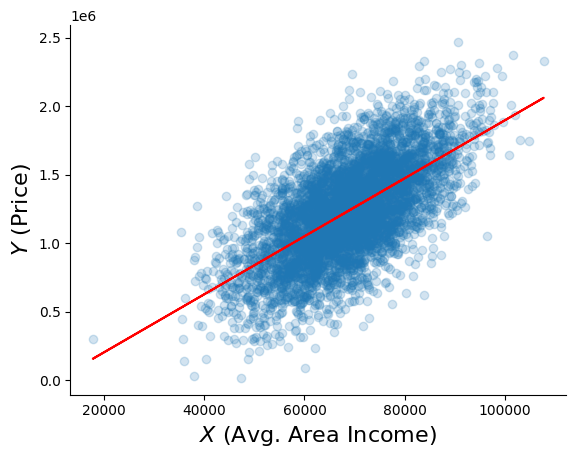

In [9]:
fig = plt.figure()
plt.plot(X,y,'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(X,Y_pred,'r-')
plt.xlabel(r'$X$ (Avg. Area Income)',fontsize=16)
plt.ylabel(r'$Y$ (Price)',fontsize=16)

for ax in fig.get_axes():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()

In [10]:
from sklearn import metrics

def print_evaluate(true, predicted):
    '''
      Função que calcula algumas das principais métricas para Regressão
        param:
            true:       valor real do y
            predicted:  valor do y obtido
    '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [11]:
print_evaluate(y, Y_pred)

MAE: 217320.48257130967
MSE: 73645940735.18942
RMSE: 271377.8560147998
R2 Square 0.4092593070338846
__________________________________


## Linear Regression with Multiple Variables

In [13]:
X = (houses_data.drop(columns=['Address', 'Price']))
y = np.array(houses_data['Price'])

In [14]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Get the model score
model.score(X, y)

0.9180238195089553

In [15]:
print_evaluate(y, y_pred)

MAE: 81359.27022837057
MSE: 10219734313.253004
RMSE: 101092.70158252279
R2 Square 0.9180238195089553
__________________________________


### Data Split

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Pipeline

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that normalizes the data then trains a model
pipeline = Pipeline([('scaler', StandardScaler()), ('linear_regression', LinearRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
pipeline.score(X_test, y_test)


0.9169678829262494

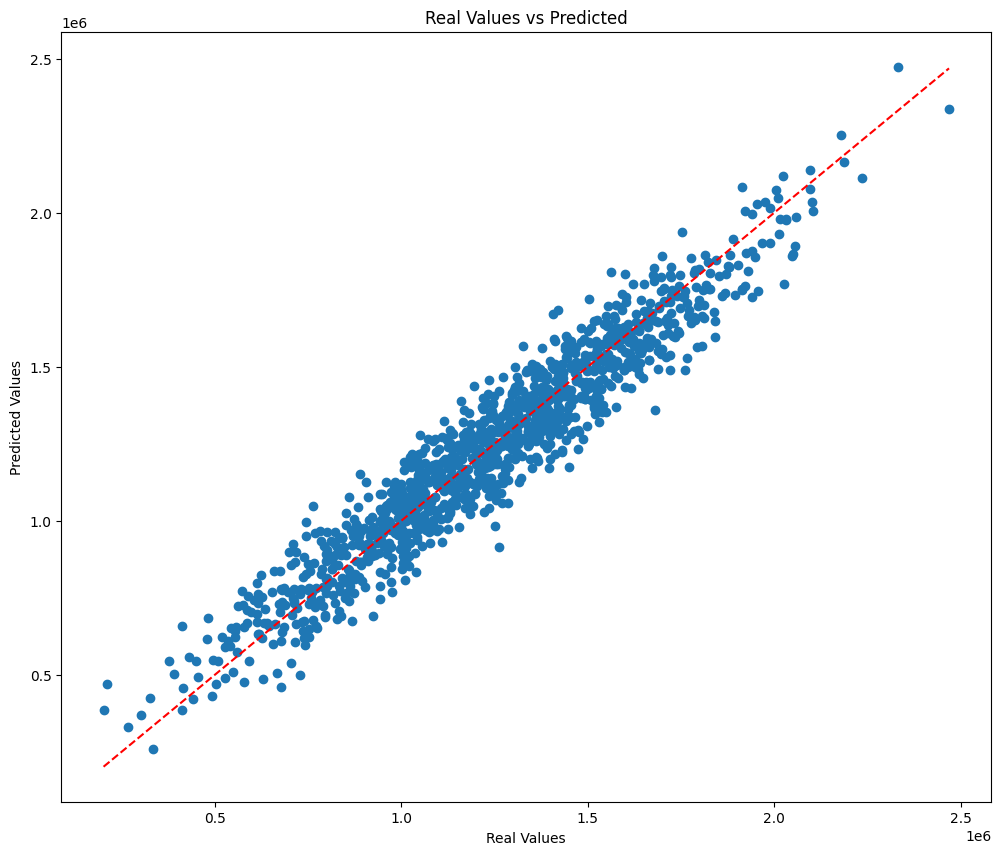

In [21]:
plt.figure(figsize=(12,10))
plt.scatter(y_test, y_pred)

# Plotando a reta do melhor cenario
xl = np.arange(min(y_test), 1.05*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

plt.plot(xl, yl, 'r--', label='Best Scenario')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Values vs Predicted')
plt.show()

### Analysing features weight

<Axes: >

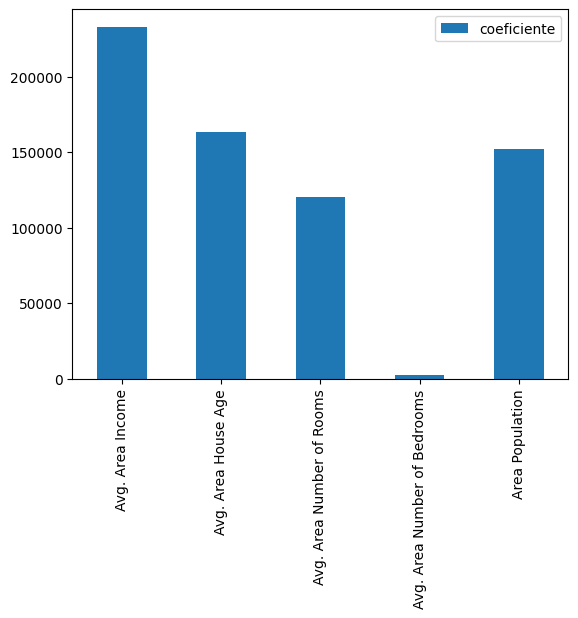

In [23]:
features_coef = {}
coefs = pipeline['linear_regression'].coef_
for idx, column in enumerate(X_train.columns):
    features_coef[column] = coefs[idx]

for key in features_coef.keys():
    features_coef[key] = [features_coef[key]]
df_coefs = pd.DataFrame.from_dict(features_coef, orient='index', columns=['coeficiente'])
df_coefs.plot.bar()

### Using Statsmodel and P-Value

In [24]:
df_temp = pd.DataFrame.copy(houses_data)
novos_nomes = {'Avg. Area Income': 'x1', 'Avg. Area House Age': 'x2', 'Avg. Area Number of Rooms':'x3', 'Avg. Area Number of Bedrooms':'x4', 'Area Population':'x5'}
df_temp = df_temp.rename(columns=novos_nomes)
df_temp.head(2)

,x1,x2,x3,x4,x5,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5', data=df_temp)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:48:37   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.637e+06   1.72e+04   -153.708      0.0